In [1]:
max_n_image = 192560
max_n_image_not_nan = 42560

In [2]:
from Model import SegNetModel, RetrainedClassificationModel
from HyperparameterOptimization import findOptimalBatchSize

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from math import log, ceil
import numpy as np

In [4]:
model = RetrainedClassificationModel('noname')
model.load('tcm.212-0.15.hdf5')
bs =  findOptimalBatchSize(model, 128, save_excel=False)
acc_arr = []
hst_arr = []
for reduce_size in np.array(2) ** range(10, int(ceil(log(max_n_image_not_nan, 2))) + 1):
    reduce_size = min(reduce_size, max_n_image_not_nan)
    hst = model.train(bs, n_epoch=1000, reduced_size=reduce_size)
    hst_arr.append(hst)
    model.model.save(str(reduce_size) + '.hd5')
    acc = model.eval(bs, remove_nan=False)
    acc_arr.append(acc)
    print(reduce_size, acc)

C:\Users\matech\source\machine learning\Airbus-Ship-Detection-Challenge\Model\RetrainedClassificationModel.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  self.model = Model(input=model.input, output=predictions)


Testing batch size 128
Epoch 1/1
ResourceExhaustedError
Testing batch size 64
Epoch 1/1
ResourceExhaustedError
Testing batch size 32
Epoch 1/1
11/11 [==============================] - 71s 6s/step - loss: 0.1496 - precision: 0.5594 - recall: 0.6768 - f1: 0.6048 - val_loss: 0.0925 - val_precision: 0.6709 - val_recall: 0.5276 - val_f1: 0.5902
Testing batch size 16
Epoch 1/1
22/22 [==============================] - 16s 745ms/step - loss: 0.0907 - precision: 0.6652 - recall: 0.6120 - f1: 0.6335 - val_loss: 0.0869 - val_precision: 0.7643 - val_recall: 0.4936 - val_f1: 0.5991
Testing batch size 8
Epoch 1/1
44/44 [==============================] - 15s 345ms/step - loss: 0.0776 - precision: 0.7264 - recall: 0.6250 - f1: 0.6655 - val_loss: 0.0748 - val_precision: 0.7104 - val_recall: 0.5918 - val_f1: 0.6447
Testing batch size 4
Epoch 1/1
88/88 [==============================] - 16s 183ms/step - loss: 0.0772 - precision: 0.7251 - recall: 0.6079 - f1: 0.6526 - val_loss: 0.0990 - val_precision: 0.5

In [ ]:
# model = RetrainedClassificationModel('noname')
# model.load('tcm.212-0.15.hdf5')
# hst = model.train(32, n_epoch=1, reduced_size=1024)
# acc = model.eval(32, remove_nan=False)

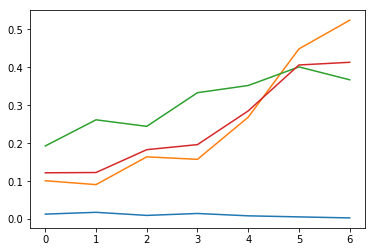

In [11]:
import matplotlib.pyplot as plt
# plt.plot([a[3] for a in acc_arr])
plt.plot(acc_arr)
plt.show()